# 统计学

收集分析解释数据并从数据中得出结论的科学 ---摘自统计学第七版
    
![统计数据类型](./img/data_type.png)

# 数据的图表展示

![统计数据类型](./img/data_type.jpg)

## 1.数据的预处理

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('data/1.txt',sep='\t',header=0)

In [3]:
data.head()

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
0,张松,69,68,84,86
1,王翔,91,75,95,94
2,田雨,54,88,67,78
3,李华,81,60,86,64
4,赵颖,75,96,81,83


### 数据筛选

In [4]:
#统计学>80
data.loc[data["统计学成绩"] >80].head()

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
1,王翔,91,75,95,94
3,李华,81,60,86,64
5,宋媛,83,72,66,71
7,陈风,87,76,92,77
8,南北,84,32,45,65


In [5]:
#统计学>80和英语成绩>80
data.loc[(data["统计学成绩"] >80)&(data["英语成绩"] >80)].head()

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
1,王翔,91,75,95,94
3,李华,81,60,86,64
7,陈风,87,76,92,77


### 数据排序

In [6]:
#按照降序排列
data.sort_values(by='统计学成绩', ascending=False).head()

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
1,王翔,91,75,95,94
7,陈风,87,76,92,77
8,南北,84,32,45,65
5,宋媛,83,72,66,71
3,李华,81,60,86,64


### 数据透视表

In [7]:
#指定索引和列名 \t 分割
data2=pd.read_csv('data/2.txt',sep='\t',header=0, index_col=0)

In [8]:
pd.pivot_table(data2,index=["性别","买衣物首选因素"])

平均月生活费(元)  月平均衣物支出(元)
性别 买衣物首选因素                       
女  价格           462.5     101.875
   品牌           650.0      65.000
   款式           640.0     186.000
男  价格           550.0      75.000
   品牌           850.0     255.000
   款式           700.0     190.000

pivot_table参数说明  
名称	说明   
data	接收DataFrame。表示透视表的数据。无默认。  
values	接收字符串。用于指定想要聚合的数据字段名，默认使用全部数据。默认为None。
index	接收string或list。表示行分组键。默认为None。  
columns	接收string或list。表示列分组键。默认为None。  
aggfunc	接收functions。表示聚合函数。默认为mean。  
fill_value	接受scalar。表示是否将fill_value的数值代替缺失值。默认为None。  
margins	接收boolearn。表示汇总（Total）功能的开关，设为True后结果集中会出现名为“ALL”的行和列。默认为True。  
dropna	接收boolearn。表示是否删掉全为NaN的列。默认为False。  
margins_name	 接收string。表示margins为True时，'All'的名称。  

## 2.品质数据的整理与展示

### 分类数据的整理与图示

In [9]:
data3 = pd.read_excel('./data/3.xlsx',header=0)
data3['count']=1
data3.head()

,顾客性别,饮料类型,count
0,女,碳酸饮料,1
1,男,绿茶,1
2,男,矿泉水,1
3,女,矿泉水,1
4,男,碳酸饮料,1


#### 频数

In [10]:
data3.顾客性别.value_counts() 

女    28
男    22
Name: 顾客性别, dtype: int64

normalize : boolean, default False　如果设置为true，则以百分比的形式显示  
sort : boolean, default True　是否排序  
ascending : boolean, default False　默认降序排序  
bins : integer, optional 而不是数值计算，把它们分成半开放的箱子，一个方便的pd.cut，只适用于数字数据  
dropna : boolean, default True　默认删除na值  

In [11]:
total = data3['顾客性别'].count()
data3.顾客性别.value_counts().apply(lambda x :(x,str(x/total*100)+'%'))

女    (28, 56.00000000000001%)
男                 (22, 44.0%)
Name: 顾客性别, dtype: object

In [12]:
tmp3 = data3.groupby(['饮料类型','顾客性别'])
tmp3.count()

count
饮料类型 顾客性别       
其他   女         6
     男         2
果汁   女         5
     男         1
矿泉水  女         4
     男         6
碳酸饮料 女         9
     男         6
绿茶   女         4
     男         7

In [13]:
#频数分布表
countTable = pd.pivot_table(data3,values=['饮料类型','顾客性别'],index=['饮料类型'],columns=['顾客性别'],aggfunc='count')
countTable

count   
顾客性别     女  男
饮料类型         
其他       6  2
果汁       5  1
矿泉水      4  6
碳酸饮料     9  6
绿茶       4  7

#### 分类数据的图示

In [14]:
drinkTable = data3.饮料类型.value_counts()
drinkTable

碳酸饮料    15
绿茶      11
矿泉水     10
其他       8
果汁       6
Name: 饮料类型, dtype: int64

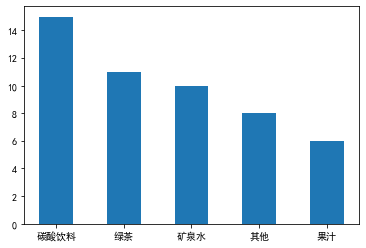

In [15]:
#条形图
# 将全局的字体设置为黑体
plt.rcParams['font.family'] = 'SimHei'
# 绘图 x x轴， height 高度, 默认：c|olor="blue", width=0.8
p1 = plt.bar(range(len(drinkTable)), height=drinkTable.values, width=0.5,tick_label=drinkTable.index)
# 展示图形
plt.show()

bar说明  
参数	说明	类型  
x	x坐标	int,float  
height	条形的高度	int,float  
width	宽度	0~1，默认0.8  
botton	条形的起始位置	也是y轴的起始坐标  
align	条形的中心位置	“center”,"lege"边缘  
color	条形的颜色	“r","b","g","#123465"，默认“b"  
edgecolor	边框的颜色	同上  
linewidth	边框的宽度	像素，默认无，int  
tick_label	下标的标签	可以是元组类型的字符组合  
log	y轴使用科学计算法表示	bool   
orientation	是竖直条还是水平条	竖直："vertical"，水平条："horizontal"  

In [16]:
countTable

count   
顾客性别     女  男
饮料类型         
其他       6  2
果汁       5  1
矿泉水      4  6
碳酸饮料     9  6
绿茶       4  7

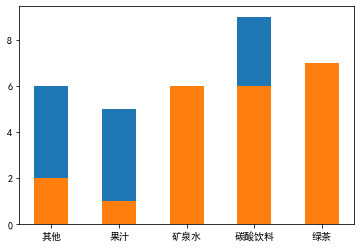

In [17]:
p1 = plt.bar(range(len(countTable)), height=countTable.values[:,0], width=0.5,tick_label=countTable.index)
p2 = plt.bar(range(len(countTable)), height=countTable.values[:,1], width=0.5,tick_label=countTable.index)

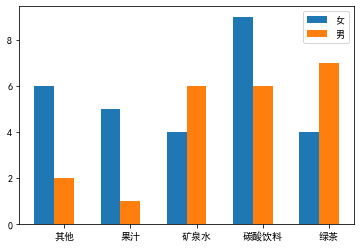

In [18]:
length = range(len(countTable))
p1 = plt.bar(length, height=countTable.values[:,0], width=0.3,tick_label=countTable.index,label='女')
p2 = plt.bar(np.arange(len(countTable))+0.3, height=countTable.values[:,1], width=0.3,tick_label=countTable.index, align="center",label='男')
# 展示图形
plt.legend()

[0.1, 0, 0, 0, 0]


([<matplotlib.patches.Wedge at 0x1b4b31a39e8>,
 [Text(0.7053422663930613, 0.9708204196655013, '碳酸饮料'),
  Text(-0.9287607599924327, 0.5894094083896856, '绿茶'),
  Text(-0.8018654323526336, -0.7530018780839288, '矿泉水'),
  Text(0.33991877217145827, -1.046162142464278, '其他'),
  Text(1.0227541568457088, -0.40493695145642544, '果汁')],
 [Text(0.41144965539595235, 0.5663119114715424, '30.00%'),
  Text(-0.5065967781776904, 0.3214960409398285, '22.00%'),
  Text(-0.43738114491961827, -0.4107282971366884, '20.00%'),
  Text(0.18541023936624995, -0.5706338958896061, '16.00%'),
  Text(0.5578659037340229, -0.22087470079441385, '12.00%')])

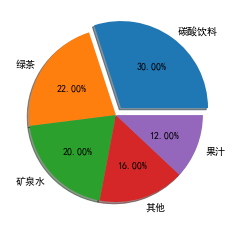

In [19]:
explode = [0.1,0,0,0,0]
print(explode)
colors=['red', 'pink', 'magenta','purple','orange']
plt.pie(drinkTable,labels=drinkTable.index,explode=explode, shadow=True, autopct="%0.2f%%")

plt.pie(x = data, # 绘图数据  
    labels=labels, # 添加编程语言标签  
    explode=explode, # 突出显示Python  
    colors=colors, # 设置饼图的自定义填充色  
    autopct='%.3f%%', # 设置百分比的格式，此处保留3位小数  
    pctdistance=0.8,  # 设置百分比标签与圆心的距离  
    labeldistance = 1.15, # 设置标签与圆心的距离  
    startangle = 180, # 设置饼图的初始角度  
    center = (4, 4), # 设置饼图的圆心（相当于X轴和Y轴的范围）  
    radius = 3.8, # 设置饼图的半径（相当于X轴和Y轴的范围）  
    counterclock = False, # 是否逆时针，这里设置为顺时针方向  
    wedgeprops = {'linewidth': 1, 'edgecolor':'green'},# 设置饼图内外边界的属性值  
    textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值  
    frame = 1) # 是否显示饼图的圆圈，此处设为显示  

Text(0.5, 1.0, '女饮料占比')

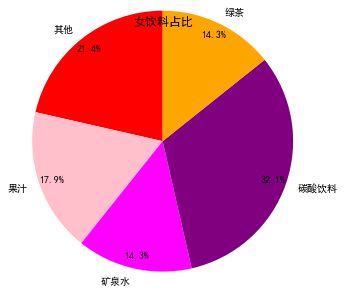

In [20]:
plt.pie(countTable.values[:,0],startangle=90,autopct='%1.1f%%',colors=colors,radius=1.5,pctdistance = 0.9, labels=countTable.index)
plt.title('女饮料占比')

Text(0.5, 1.0, '男饮料占比')

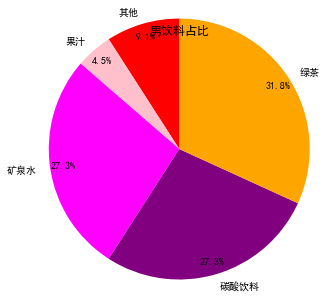

In [21]:
plt.pie(countTable.values[:,1],startangle=90,autopct='%1.1f%%',colors=colors,radius=1.5,pctdistance = 0.9, labels=countTable.index)
plt.title('男饮料占比')

[None]

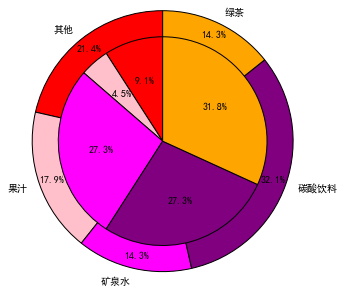

In [22]:
fig,ax = plt.subplots()
pie_1 = ax.pie(countTable.values[:,0],startangle=90,autopct='%1.1f%%',colors=colors,radius=1.5,pctdistance = 0.9, labels=countTable.index)
pie_2 = ax.pie(countTable.values[:,1],startangle=90,autopct='%1.1f%%',colors=colors,radius=1.2,pctdistance = 0.6)
 
#添加多重饼图的分割线
for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('black')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('black')
ax.set(aspect="equal")

### 数值型数据

In [23]:
dataSource4 = pd.read_excel('./data/例3.6.xlsx',header=0)
data4 = dataSource4.values[:,0]
data4

array([234, 143, 187, 161, 150, 228, 153, 166, 154, 174, 156, 203, 159,
       198, 160, 152, 161, 162, 163, 196, 164, 226, 165, 165, 187, 141,
       214, 149, 178, 223, 218, 179, 215, 180, 175, 196, 155, 167, 168,
       211, 168, 170, 180, 171, 233, 172, 210, 172, 172, 194, 173, 196,
       174, 165, 175, 233, 175, 190, 207, 176, 183, 225, 178, 234, 153,
       179, 144, 179, 188, 172, 181, 182, 182, 177, 184, 185, 186, 186,
       178, 187, 237, 187, 205, 188, 177, 189, 209, 189, 190, 175, 191,
       173, 194, 189, 195, 195, 163, 196, 176, 196, 160, 197, 197, 174,
       198, 200, 201, 202, 158, 203, 188, 206, 171, 208, 192, 210, 168,
       211, 172, 213], dtype=int64)

In [24]:
bins = np.arange(140,250,10)
score_cut = pd.cut(data4,bins =  bins.tolist())
score_cut 

[(230, 240], (140, 150], (180, 190], (160, 170], (140, 150], ..., (200, 210], (160, 170], (210, 220], (170, 180], (210, 220]]
Length: 120
Categories (10, interval[int64]): [(140, 150] < (150, 160] < (160, 170] < (170, 180] ... (200, 210] < (210, 220] < (220, 230] < (230, 240]]

In [25]:
pd.value_counts(score_cut,sort=False)

(140, 150]     5
(150, 160]    10
(160, 170]    15
(170, 180]    28
(180, 190]    20
(190, 200]    16
(200, 210]    11
(210, 220]     6
(220, 230]     4
(230, 240]     5
dtype: int64

#### 数据分组(直方图)

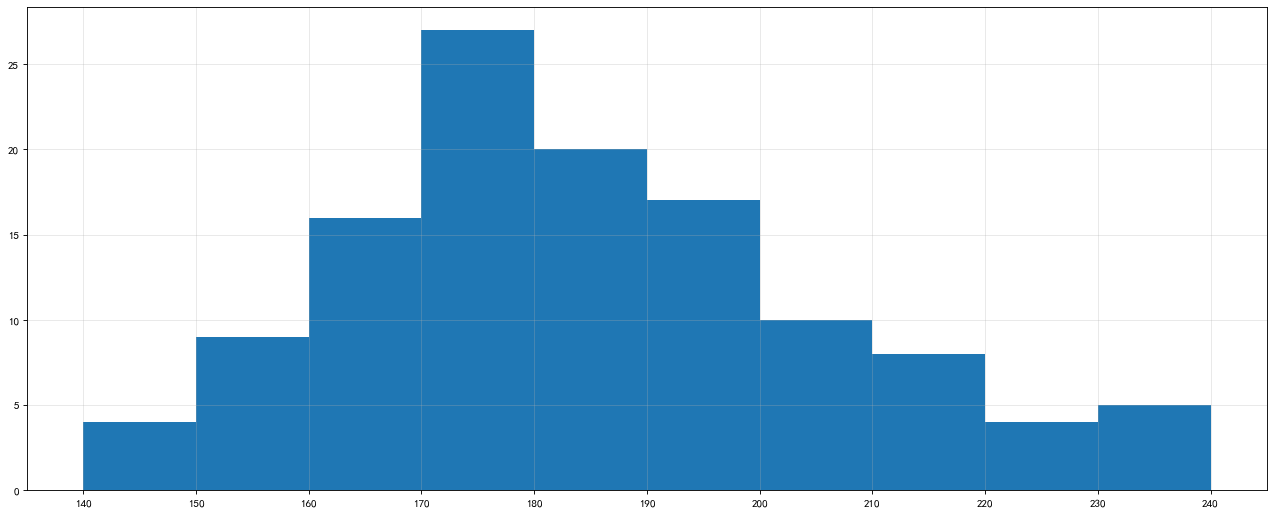

In [26]:
plt.figure(figsize=(20, 8), dpi=80) # 设置图片大小
plt.hist(data4, bins,label=score_cut) # 加上normed=True属性之后变为频率分布直方图
# 设置x轴的刻度
plt.xticks(bins)
plt.grid(alpha=0.3)
plt.show()

x : (n,) array or sequence of (n,) arrays(可以是一个array也可以是多个array)

integer or array_like or ‘auto’, optional(可以是整型来设置箱子的宽度,也可以是array,指定每个箱子的宽度)

range : tuple or None, optional(设置显示的范围,范围之外的将被舍弃)

normed : boolean, optional(?)是否将得到的直方图向量归一化
normed=True表示正则化直方图，即归一化（即求频率）

weights : (n, ) array_like or None, optional(?)

cumulative : boolean, optional(?)

bottom : array_like, scalar, or None(?)

histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}, optional(选择展示的类型,默认为bar)

align : {‘left’, ‘mid’, ‘right’}, optional(对齐方式)

orientation : {‘horizontal’, ‘vertical’}, optional(直方图方向)

log : boolean, optional(log刻度)

color : color or array_like of colors or None, optional(颜色设置)

label : string or None, optional(刻度标签)

stacked : boolean, optional(?)

alpha 透明度

#### 未数据分组(箱线图)

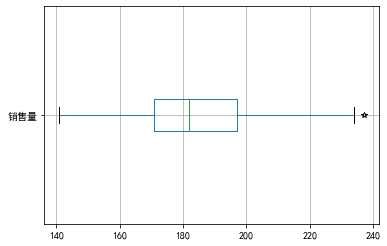

In [27]:
dataSource4.boxplot(sym = '*',vert=False)
plt.show()

f = df.boxplot(sym = 'o',  # 异常点形状，参考marker  
               vert = True,  # 是否垂直  
               whis = 1.5,  # IQR，默认1.5，也可以设置区间比如[5,95]，代表强制上下边缘为数据95%和5%位置  
               patch_artist = True,  # 上下四分位框内是否填充，True为填充  
               meanline = False,showmeans=True,  # 是否有均值线及其形状  
               showbox = True,  # 是否显示箱线  
               showcaps = True,  # 是否显示边缘线  
               showfliers = True,  # 是否显示异常值  
               notch = False,  # 中间箱体是否缺口  
               return_type='dict'  # 返回类型为字典  
              ) 

In [28]:
data5 = pd.read_excel('./data/例3.7.xlsx',header=1,index_col=1).drop(['名称'],axis=1)

In [29]:
data5.head(10)

,1,2,3,4,5,6,7,8,9,10,11
课程名称,,,,,,,,,,,
英语,76,90,97,71,70,93,86,83,78,85,81
经济数学,65,95,51,74,78,63,91,82,75,71,55
西方经济学,93,81,76,88,66,79,83,92,78,86,78
市场营销学,74,87,85,69,90,80,77,84,91,74,70
财务管理,68,75,70,84,73,60,76,81,88,68,75
基础会计学,70,73,92,65,78,87,90,70,66,79,68
统计学,55,91,68,73,84,81,70,69,94,62,71
计算机应用基础,85,78,81,95,70,67,82,72,80,81,77


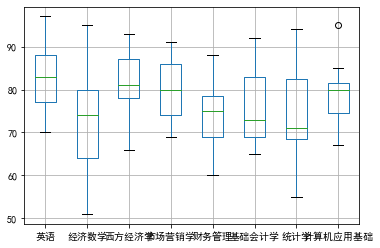

In [30]:
data5.T.boxplot()

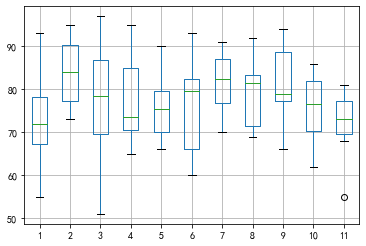

In [31]:
data5.boxplot()

#### 时间序列数据（线图）

In [32]:
data6 = pd.read_excel('./data/例3.8.xlsx',header=0,index_col=0)

In [33]:
data6.head()

,农村城镇消费水平,城镇居民消费水平
年份,,
2006,3066,10739
2007,3538,12480
2008,4065,14061
2009,4402,15127
2010,4941,17104


Text(0.5, 1.0, '居民消费水平')

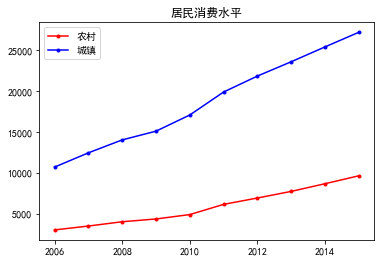

In [34]:
plt.plot(data6.index,data6.values[:,0], 'r.-',label='农村')
plt.plot(data6.index,data6.values[:,1], 'b.-',label='城镇')
plt.legend()
plt.title("居民消费水平")

#### 多变量数据展示
##### 散点图

In [35]:
data7 = pd.read_excel('./data/例3.9.xlsx',header=0,index_col=0)

In [43]:
data7.head()

,降雨量,产量
温度,,
6,25,2250
8,40,3450
10,58,4500
13,68,5750
14,110,5800


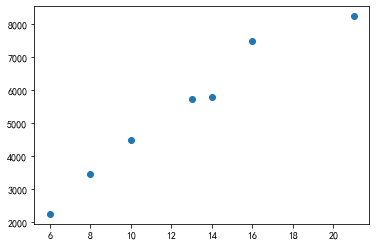

In [44]:
plt.scatter(data7.index, data7.values[:,1])

##### 气泡图

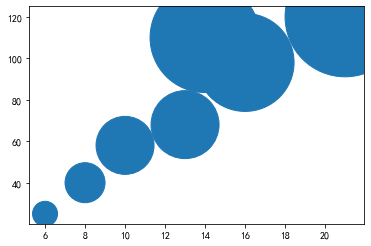

In [38]:
size =  data7.values[:,0]
plt.scatter(data7.index, size,s=np.power(size, 2))

##### 雷达图

In [39]:
data8 = pd.read_excel('./data/例3.4.xlsx',header=1,index_col=0)

In [40]:
data8.head()

,食品支出,衣着支出,居住,家庭设备及用品,医疗保健,交通和通信,文教娱乐服务,其他
地区,,,,,,,,
北京,7535.3,2638.9,1970.9,1610.7,1658.4,3781.5,3696.0,1154.2
天津,7343.6,1881.4,1854.2,1151.2,1556.4,3083.4,2254.2,899.9
上海,9655.6,2111.2,1790.5,1906.5,1016.7,4563.8,3723.7,1485.5
重庆,6870.2,2228.8,1177.0,1196.0,1101.6,1903.2,1470.6,625.7


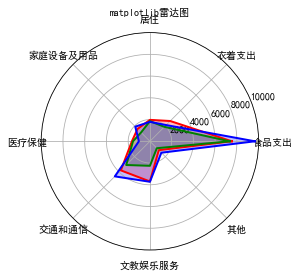

In [41]:
fig=plt.figure()
dataValue = np.array(np.concatenate((data8.values.T, data8['食品支出'].values.reshape(1,4)),axis= 0))
angle = np.linspace(0,2*np.pi,len(data8.columns),endpoint=False)
angle = np.concatenate((angle,[angle[0]]))  #闭合

ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angle, dataValue[:,0], 'r-', linewidth=2)# 画线
ax.fill(angle, dataValue[:,0], facecolor='r', alpha=0.25)# 填充

ax.plot(angle, dataValue[:,1], 'g-', linewidth=2)# 画线
ax.fill(angle, dataValue[:,1], facecolor='g', alpha=0.25)# 填充

ax.plot(angle, dataValue[:,2], 'b-', linewidth=2)# 画线
ax.fill(angle, dataValue[:,2], facecolor='b', alpha=0.25)# 填充

ax.set_thetagrids(angle * 180/np.pi, data8.columns, fontproperties="SimHei")
ax.set_title("matplotlib雷达图", va='bottom', fontproperties="SimHei")
ax.set_rlim(0,10000)
ax.grid(True)
plt.show()